In [168]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots

from scipy.optimize import  curve_fit
from sklearn.metrics import r2_score

plt.style.use(['science', 'notebook', 'grid'])

In [169]:
#Modelo Teórico

mu = 4*np.pi *1e-7

N = 760

L = 14.80 *1e-2
L_err = 0.05*1e-2

R = (3.9 + 6.9)/4 * 1e-2
R_err = 0.03 * 1e-2 

n = N/L
n_err = N/(L**2) * L_err

eta = R/L
eta_err = R_err/L + R/L**2 *L_err

a = mu*n/2 * (1/np.sqrt(1/4 + eta**2))
a_err = mu/2 * (1/np.sqrt(1/4 + eta**2)) * n_err + mu*n/4 * (1/4 + eta**2)**(-3/2) * 2*eta *eta_err

a_ideal = mu*n
a_ideal_err = mu*n_err


In [170]:
N_2 = 2100
L_2 = 59.50 *1e-3
R_2 = 15/2 *1e-3
R_2_err = 0.03*1e-3

In [171]:
L = N_2*np.pi*R_2**2*a
L_err = N_2*np.pi*R_2**2*a_err + 2*N_2*np.pi*R_2*a*R_2_err

print(f'L = {L} +- {L_err}')


L = 0.0022496464050548374 +- 2.9426925140633462e-05


In [172]:
L_ideal = N_2*np.pi*R_2**2*a_ideal
L_ideal_err = N_2*np.pi*R_2**2*a_ideal_err + 2*N_2*np.pi*R_2*a_ideal*R_2_err

print(f'L = {L_ideal} +- {L_ideal_err}')


L = 0.0023947127975886403 +- 2.7247948318508578e-05


In [173]:
#Resistor usado
R = 10.0
R_err = 0.1

In [174]:
#Negócio que a apostila pede

A_R = 3.28
A_R_err = 0.01

A_I = A_R/R
A_I_err = A_R_err/R + A_R/(R**2) * R_err

print(f'A_I = {A_I} +- {A_I_err}')

A_I = 0.32799999999999996 +- 0.00428


In [175]:
#Outro negócio que a apostila pede

omega = 2*np.pi/(8.8*1e-3)
omega_err = 2*np.pi/((8.8*1e-3)**2) *0.1*1e-3

A_V = L*A_I*omega 
A_V_err = L_err*A_I*omega + L*A_I_err*omega + L*A_I*omega_err

print(f'A = {A_V} +- {A_V_err}')

A = 0.5268479588928974 +- 0.019753166326954546


In [176]:
#Resistor usado
R = 10.1
R_err = 0.1

In [177]:
#Determinação experimnetal da indutância

A_R = np.array([3.025,2.901, 2.782, 2.638, 2.424,2.210, 1.922, 1.544]) 
A_R_err = np.array([0.001,0.001,0.001,0.001, 0.001, 0.001, 0.001, 0.001]) 

A_V = np.array([2.161,2.476, 2.784, 3.042, 3.361, 3.650, 3.892, 4.229]) 
A_V_err = np.array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]) 

omega = 2*np.pi*np.array([503.3, 604.0, 717.0, 827.3, 1007,1202, 1502, 2008])
omega_err = 2*np.pi*np.array([0.1, 0.1, 0.1, 0.1, 1, 1, 1, 1]) 

A_I = A_R/R
A_I_err = A_R_err/R + A_R/(R**2) * R_err

x_data = A_I * omega
x_data_err = A_I_err*omega + A_I*omega_err

y_data = A_V
y_data_err = A_V_err

In [178]:
def func(x_data,a, b):
    return a*x_data + b

popt, pcov = curve_fit(func, x_data, y_data)
a, b = popt
a_err, b_err = np.sqrt(np.diag(pcov))
r2 = r2_score(y_data, func(x_data, *popt))
print('a = ', a)
print('b = ', b)
print(r'r^2 =', r2)
print('a_err = ', a_err)
print('b_err = ', b_err)


a =  0.0020741799983934324
b =  0.20959027967503296
r^2 = 0.999213408582581
a_err =  2.3758353663353833e-05
b_err =  0.03508925298093007


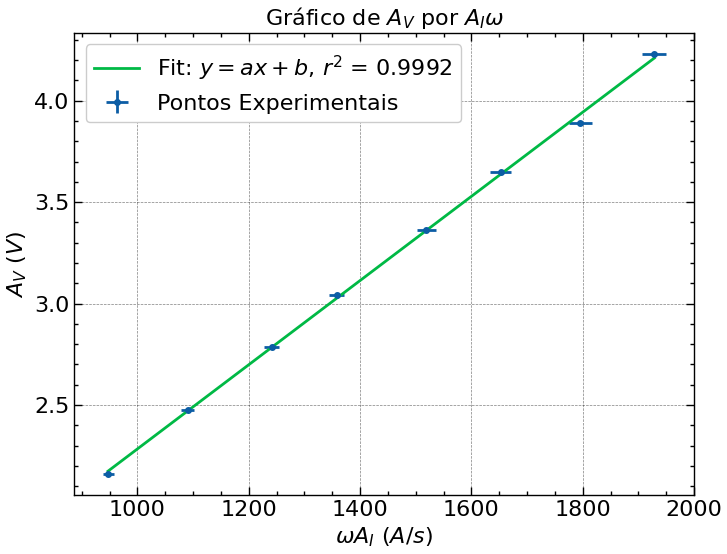

In [179]:
plt.errorbar(x_data, y_data, xerr=x_data_err, yerr=y_data_err, marker = 'o',ms = 4, ls = '', label = 'Pontos Experimentais')
plt.plot(x_data, func(x_data,a,b) , label= r'Fit: $y = ax + b$, $r^2$ = %.4f' % (r2))

plt.xlabel(r'$ \omega A_I \ (A/s)$')
plt.ylabel(r'$A_{V} \ (V) $')
plt.title(r'Gráfico de $A_V$ por $A_I \omega$')

plt.legend()

In [180]:
A_I

array([0.29950495, 0.28722772, 0.27544554, 0.26118812, 0.24      ,
       0.21881188, 0.19029703, 0.15287129])

In [181]:
A_I_err

array([0.00306441, 0.00294285, 0.00282619, 0.00268503, 0.00247525,
       0.00226546, 0.00198314, 0.00161259])

In [182]:
A_V

array([2.161, 2.476, 2.784, 3.042, 3.361, 3.65 , 3.892, 4.229])

In [183]:
A_V_err

array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001])

In [184]:
omega

array([ 3162.3271651 ,  3795.04392554,  4505.04386525,  5198.07920463,
        6327.16760433,  7552.38873923,  9437.34433138, 12616.63609682])

In [185]:
omega_err

array([0.62831853, 0.62831853, 0.62831853, 0.62831853, 6.28318531,
       6.28318531, 6.28318531, 6.28318531])